# European Vanilla Option Pricing and Sensitivities

## Introduction

An option is defined as a financial instrument that gives its holder the right, but not the obligation, to buy (call option) or sell (put option) a predefined underlying security at a set exercise price at a specified maturity date. Options are a form of derivative security, as they derive their values from their underlying asset. There are several types of options, amongst which European options can only exercised at the maturity
date. Other types of options include American options, Bermudan options and Barrier options etc.

we introduce the type of options in section 2.1 briefly. Then we explain the type
of underlying asset price diffusions in section 2.2 along with analytical solution of geometric
Brownian motion and Ornstein Uhlenbeck process. We then introduce the Monte Carlo methods
for pricing European, Asian and Barrier Options in section 2.3. Finally, the Black-Scholes
framework and analytical formulas for pricing call and put versions of European and (downand-out and up-and-out) Barrier options are explained in section 2.4.


## Black-Scholes PDE and Analytical Solution for European Vanilla Options

We make the following assumptions:
* No dividends are paid during the option's life
* Market movements cannot be predicted
* The risk-free rate and volatility are constant
* Follows a lognormal distribution

Assume also that underlying spot follows Geometric Brownian Motion, i.e.

\begin{equation*}
dS_t = \mu S_t dt + \sigma S_t dW
\end{equation*}

where $dW=\epsilon(t) \sqrt{dt}$ is a Wiener process and $\epsilon(t)$ is a standardised normal random variable.

Now consider the value of the option at time $t$, $V(S, t)$ as a function of $S$ and $t$, if the price of the underlying stock at time $t$ is $S$. We also assume that $V(S, t)$ is twice differentiable with respect to $S$ and once with
respect to $t$. Then $V(S, t)$ must satisfy the Black-Scholes partial differential equation:

\begin{equation*}
\frac{\partial V}{\partial t} + r S \frac{\partial V}{\partial S} + \sigma^2 S^2 \frac{1}{2} \frac{\partial^2 V}{\partial S^2} = r V
\end{equation*}

where r is the risk-free interest rate.

By solving the above PDE for price of European call and put options, we get

\begin{equation*}
C_t=S_t\Phi(d_1)−K e^{−rT} \Phi(d_1)\\
P_t=K e^{−rT} \Phi(d_1) - S_t\Phi(d_1)
\end{equation*}

where

\begin{equation*}
d_1=\frac{ln(\frac{S_t}{K})+(r+\frac{\sigma^2}{2})T }{\sigma\sqrt{T}}\\
d_2=d_1 - \sigma\sqrt{T}=\frac{ln(\frac{S_t}{K})+(r-\frac{\sigma^2}{2})T }{\sigma\sqrt{T}}\\
\end{equation*}

and $\Phi(.)$ is the standard normal cumulative distribution function.

## Python Implementation

We create a class that stores option details

In [1]:
import numpy as np
import scipy.stats as si

In [2]:
class Option:
  def __init__(self, S, K, T, r, sigma, option):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    self.S = S
    self.K = K
    self.T = T
    self.r = r
    self.sigma = sigma
    self.option = option

We use the following option as the example.

In [32]:
ex = Option(100, 110, 1, 0.05, 0.2, 'call')

In [4]:
def BSPrice(Option):
    
    d1 = (np.log(Option.S / Option.K) + (Option.r + 0.5 * Option.sigma ** 2) * Option.T) / (Option.sigma * np.sqrt(Option.T))
    d2 = (np.log(Option.S / Option.K) + (Option.r - 0.5 * Option.sigma ** 2) * Option.T) / (Option.sigma * np.sqrt(Option.T))
    
    if Option.option == 'call':
        result = (Option.S * si.norm.cdf(d1, 0.0, 1.0) - Option.K * np.exp(-Option.r * Option.T) * si.norm.cdf(d2, 0.0, 1.0))
    if Option.option == 'put':
        result = (Option.K * np.exp(-Option.r * Option.T) * si.norm.cdf(-d2, 0.0, 1.0) - Option.S * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result

In [5]:
BSPrice(ex)

6.040088129724239

## The Greeks

### Delta

Delta measures the sensitivity of the option's price to the variation of underlying's price.

\begin{equation*}
Delta^{Call}=\frac{\partial C_t}{\partial S_t} = \Phi(d_1)\\
Delta^{Put}=\frac{\partial P_t}{\partial S_t} = -\Phi(-d_1)
\end{equation*}

In [6]:
def delta(Option):
    
    d1 = (np.log(Option.S / Option.K) + (Option.r + 0.5 * Option.sigma ** 2) * Option.T) / (Option.sigma * np.sqrt(Option.T))
    
    if Option.option == 'call':
        result = si.norm.cdf(d1, 0.0, 1.0)
    if Option.option == 'put':
        result = -si.norm.cdf(-d1, 0.0, 1.0)
        
    return result

In [37]:
ex = Option(120, 110, 0.2, 0.05, 0.2, 'call')

In [38]:
delta(ex)

0.8706231054492588

### Gamma

Gamma measures the sensitivity of the option's Delta to the variation of underlying's price.

\begin{equation*}
Gamma^{Call} = Gamma^{Put} = \frac{\partial^2 C_t}{\partial S_t^2} = \frac{\Phi'(d_1)}{S_t\sigma\sqrt{T}}
\end{equation*}

In [8]:
def gamma(Option):
    
    d1 = (np.log(Option.S / Option.K) + (Option.r + 0.5 * Option.sigma ** 2) * Option.T) / (Option.sigma * np.sqrt(Option.T))
    
    gamma = si.norm.pdf(d1) / (Option.S * Option.sigma * np.sqrt(Option.T))
    
    return gamma

In [9]:
gamma(ex)

0.019788024019409666

### Vega

Vega measures the sensitivity of the option's price to the variation in the volatility of the underlying's return.

\begin{equation*}
Vega^{Call} = Vega^{Put} = \frac{\partial C_t}{\partial \sigma} = S_t\sqrt{T}\Phi'(d_1)
\end{equation*}

In [10]:
def vega(Option):
    
    d1 = (np.log(Option.S / Option.K) + (Option.r + 0.5 * Option.sigma ** 2) * Option.T) / (Option.sigma * np.sqrt(Option.T))
    
    vega = Option.S * si.norm.pdf(d1) * np.sqrt(Option.T)
    
    return vega

In [11]:
vega(ex)

39.57604803881934

### Theta

Theta measures the sensitivity of the option's price to the passage of time.

\begin{equation*}
Theta^{Call}=\frac{\partial C_t}{\partial T} = -\frac{S_t \sigma}{2\sqrt{T}} \Phi'(d_1)-rKe^{-rT}\Phi(d_2)\\
Theta^{Put}=\frac{\partial P_t}{\partial T} = -\frac{S_t \sigma}{2\sqrt{T}} \Phi'(d_1)+rKe^{-rT}\Phi(-d_2)
\end{equation*}

In [12]:
def theta(Option):
    
    d1 = (np.log(Option.S / Option.K) + (Option.r + 0.5 * Option.sigma ** 2) * Option.T) / (Option.sigma * np.sqrt(Option.T))
    d2 = (np.log(Option.S / Option.K) + (Option.r - 0.5 * Option.sigma ** 2) * Option.T) / (Option.sigma * np.sqrt(Option.T))
    
    if Option.option == 'call':
        theta = (-Option.sigma * Option.S * si.norm.pdf(d1)) / (2 * np.sqrt(Option.T)) - Option.r * Option.K * np.exp(-Option.r * Option.T) * si.norm.cdf(d2, 0.0, 1.0)
    if Option.option == 'put':    
        theta = (-Option.sigma * Option.S * si.norm.pdf(d1)) / (2 * np.sqrt(Option.T)) + Option.r * Option.K * np.exp(-Option.r * Option.T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [13]:
theta(ex)

-5.903840050581601

### Rho

Rho measures the sensitivity of the option's price to the risk-free interest rate.

\begin{equation*}
Rho^{Call}=\frac{\partial C_t}{\partial r} = TKe^{-rT}\Phi(d_2)\\
Rho^{Put}=\frac{\partial P_t}{\partial r} = -TKe^{-rT}\Phi(-d_2)
\end{equation*}

In [14]:
def rho(Option):
    
    d2 = (np.log(Option.S / Option.K) + (Option.r - 0.5 * Option.sigma ** 2) * Option.T) / (Option.sigma * np.sqrt(Option.T))
    
    if Option.option == 'call':
        rho = Option.T * Option.K * np.exp(-Option.r * Option.T) * si.norm.cdf(d2, 0.0, 1.0)
    if Option.option == 'put':
        rho = -Option.T * Option.K * np.exp(-Option.r * Option.T) * si.norm.cdf(-d2, 0.0, 1.0)
        
    return rho

In [15]:
rho(ex)

38.924704933993354

In [16]:
import matplotlib.pyplot as plt
from matplotlib import style

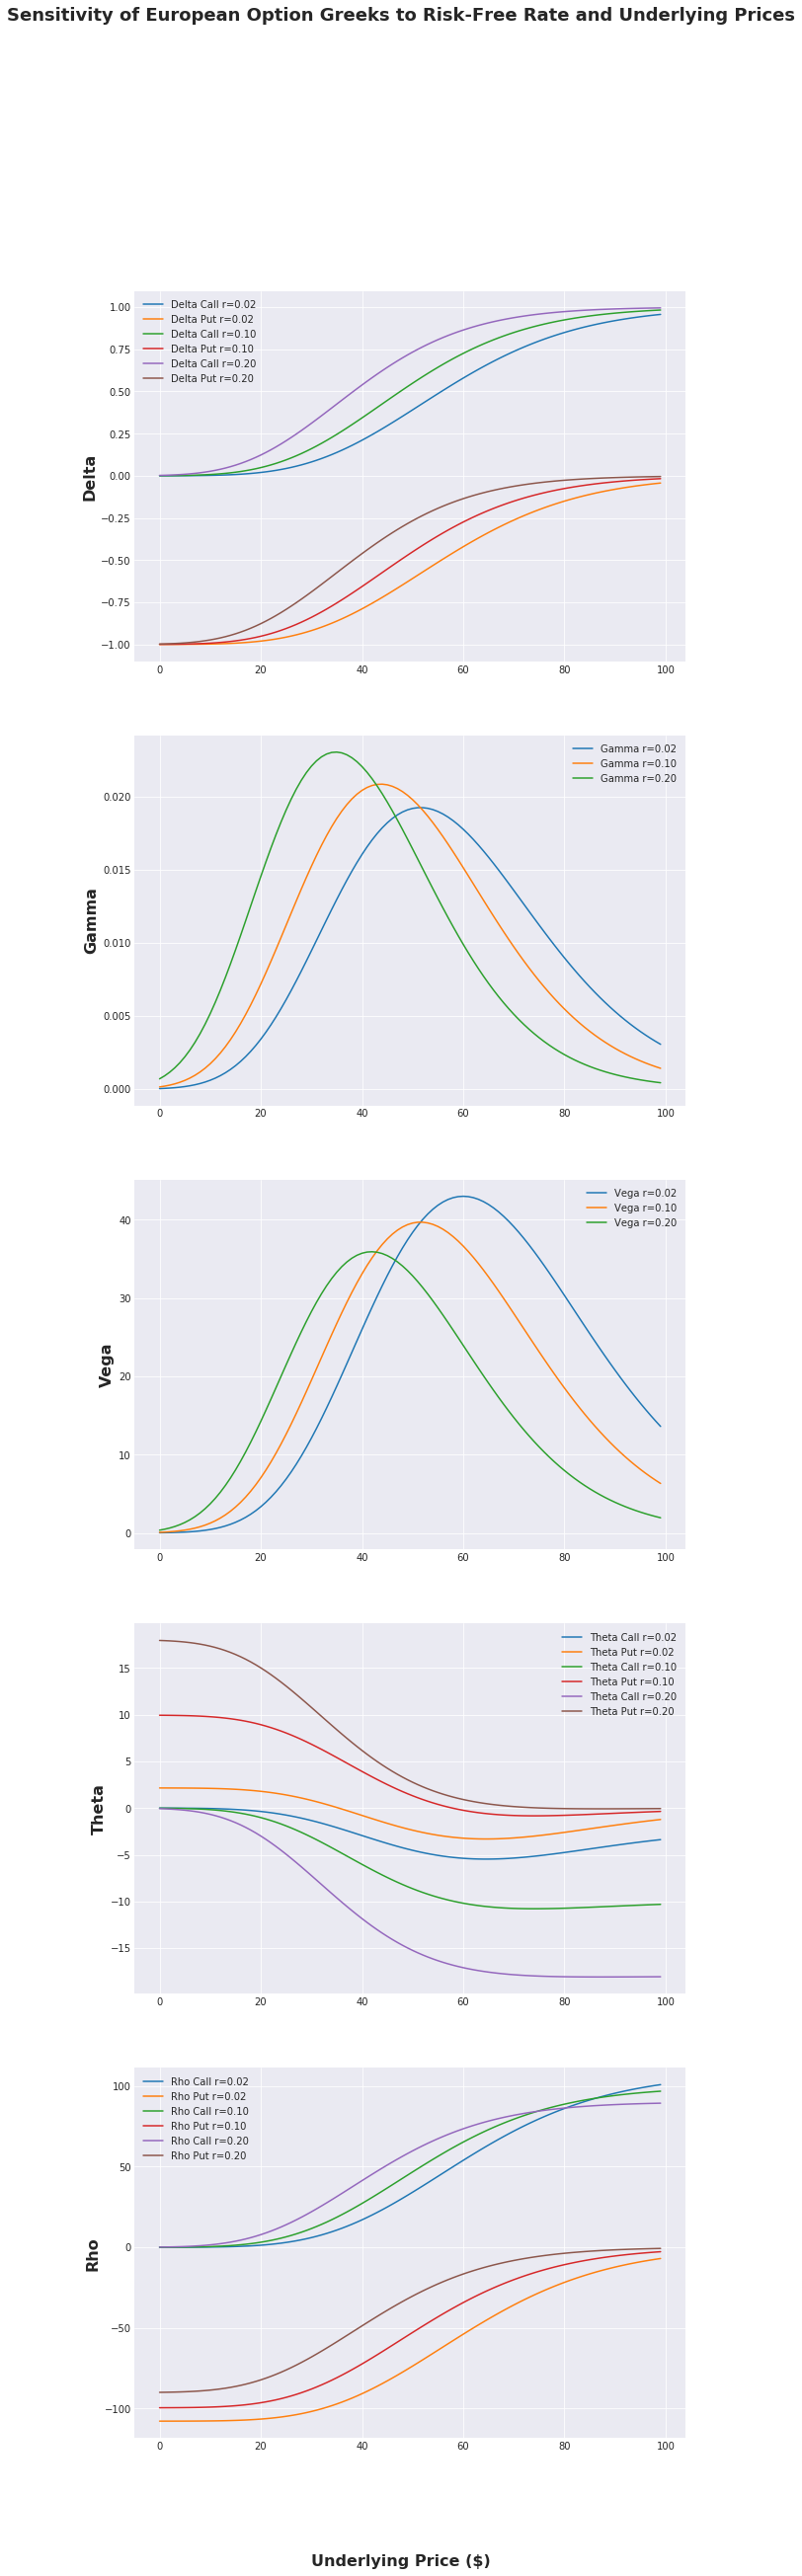

In [17]:
fig, ax = plt.subplots(nrows=5, ncols=1, sharex=True, sharey=True,figsize=(10,40))
style.use('seaborn-darkgrid')
fig.suptitle('Sensitivity of European Option Greeks to Risk-Free Rate and Underlying Prices', fontsize=18, fontweight='bold')
fig.text(0.5, 0.08, 'Underlying Price ($)', ha='center', fontsize=16, fontweight='bold')
rates = [0.02,0.1,0.2]

Option.K = ex.K
Option.sigma = ex.sigma
Option.T = ex.T

plt.subplot(511)
for Option.r in rates:
    Option.option = 'call'
    tmp_c = [delta(Option) for Option.S in np.arange(50,150)]
    Option.option = 'put'
    tmp_p = [delta(Option) for Option.S in np.arange(50,150)]
    plt.plot(tmp_c, label = ("Delta Call r=%.2f" % Option.r ))
    plt.plot(tmp_p, label = ("Delta Put r=%.2f" % Option.r ))

plt.ylabel("Delta", fontsize=16, fontweight='bold')
plt.legend()

plt.subplot(512)
for Option.r in rates:
    tmp = [gamma(Option) for Option.S in np.arange(50,150)]
    plt.plot(tmp, label = ("Gamma r=%.2f" % Option.r ))

plt.ylabel("Gamma", fontsize=16, fontweight='bold')
plt.legend()

plt.subplot(513)
for Option.r in rates:
    tmp = [vega(Option) for Option.S in np.arange(50,150)]
    plt.plot(tmp, label = ("Vega r=%.2f" % Option.r ))

plt.ylabel("Vega", fontsize=16, fontweight='bold')
plt.legend()

plt.subplot(514)
for Option.r in rates:
    Option.option = 'call'
    tmp_c = [theta(Option) for Option.S in np.arange(50,150)]
    Option.option = 'put'
    tmp_p = [theta(Option) for Option.S in np.arange(50,150)]
    plt.plot(tmp_c, label = ("Theta Call r=%.2f" % Option.r ))
    plt.plot(tmp_p, label = ("Theta Put r=%.2f" % Option.r ))

plt.ylabel("Theta", fontsize=16, fontweight='bold')
plt.legend()

plt.subplot(515)
for Option.r in rates:
    Option.option = 'call'
    tmp_c = [rho(Option) for Option.S in np.arange(50,150)]
    Option.option = 'put'
    tmp_p = [rho(Option) for Option.S in np.arange(50,150)]
    plt.plot(tmp_c, label = ("Rho Call r=%.2f" % Option.r ))
    plt.plot(tmp_p, label = ("Rho Put r=%.2f" % Option.r ))

plt.ylabel("Rho", fontsize=16, fontweight='bold')
plt.legend()


In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [58]:
def greeks_surface(greek_function, S_range, K_range, r_range, sigma_range, T_range, Option, x_var_name, y_var_name, x, y, plot):

    # Initialise vector to store our option values and then iterate over

    V = np.zeros((len(S_range), len(T_range)), dtype=np.float)
    for i in range(len(S_range)):
        for j in range(len(T_range)):
            Option.S = S_range[i]
            Option.K = K_range[i]
            Option.T = T_range[j]
            Option.r = r_range[i]
            Option.sigma = sigma_range[i]
            V[i, j] = greek_function(Option)
            print(V[j])
    
 
    # Initiliase plotting canvas 
    surf = plot.plot_surface(x, y, V, rstride=1, cstride=1,alpha=0.75,cmap=cm.coolwarm)
    plot.set_xlabel('\n' + x_var_name, linespacing=4)
    plot.set_ylabel('\n' + y_var_name, linespacing=4)
    plot.set_zlabel("%s(K, T)" % greek_function.__name__)
    plot.set_title("%s %s" % (Option.option, greek_function.__name__))
    
    # Calculate colour levels based on our meshgrid 
    Vlevels = np.linspace(V.min(),V.max(),num=8,endpoint=True)
    xlevels = np.linspace(x.min(),x.max(),num=8,endpoint=True)
    ylevels = np.linspace(y.min(),y.max(),num=8,endpoint=True)
    
    cset = plot.contourf(x, y, V, Vlevels, zdir='z',offset=V.min(),
                       cmap=cm.coolwarm,linestyles='dashed')
    cset = plot.contourf(x, y, V, xlevels, zdir='x',offset=x.min(),
                       cmap=cm.coolwarm,linestyles='dashed')
    cset = plot.contourf(x, y, V, ylevels, zdir='y',offset=y.max(),
                       cmap=cm.coolwarm,linestyles='dashed')

    # Set our viewing constraints 
    for c in cset.collections:
        c.set_dashes([(0, (2.0, 2.0))]) # Dash contours 
        plt.clabel(cset,fontsize=10, inline=1)
        plot.set_xlim(x.min(),x.max())
        plot.set_ylim(y.min(),y.max())
        plot.set_zlim(V.min(),V.max())

    # Colorbar     
    colbar = plt.colorbar(surf, shrink=1.0, extend='both', aspect = 10)
    l,b,w,h = plt.gca().get_position().bounds
    ll,bb,ww,hh = colbar.ax.get_position().bounds
    colbar.ax.set_position([ll, b+0.1*h, ww, h*0.8])

[8.43886598e-36 0.00000000e+00]
[0. 0.]
[8.43886598e-36 6.09466410e-05]
[0.99999982 0.984253  ]
[3.33959558e-35 0.00000000e+00]
[0. 0.]
[3.33959558e-35 2.48387019e-05]
[9.76556719e-08 1.31614049e-03]
[1.66979779e-33 0.00000000e+00]
[0. 0.]
[1.66979779e-33 1.24193510e-02]
[4.39450524e-05 5.92263222e+00]
[4.1983468e-35 0.0000000e+00]
[0. 0.]
[4.19834680e-35 2.91128384e-03]
[10.89054551 96.98987366]


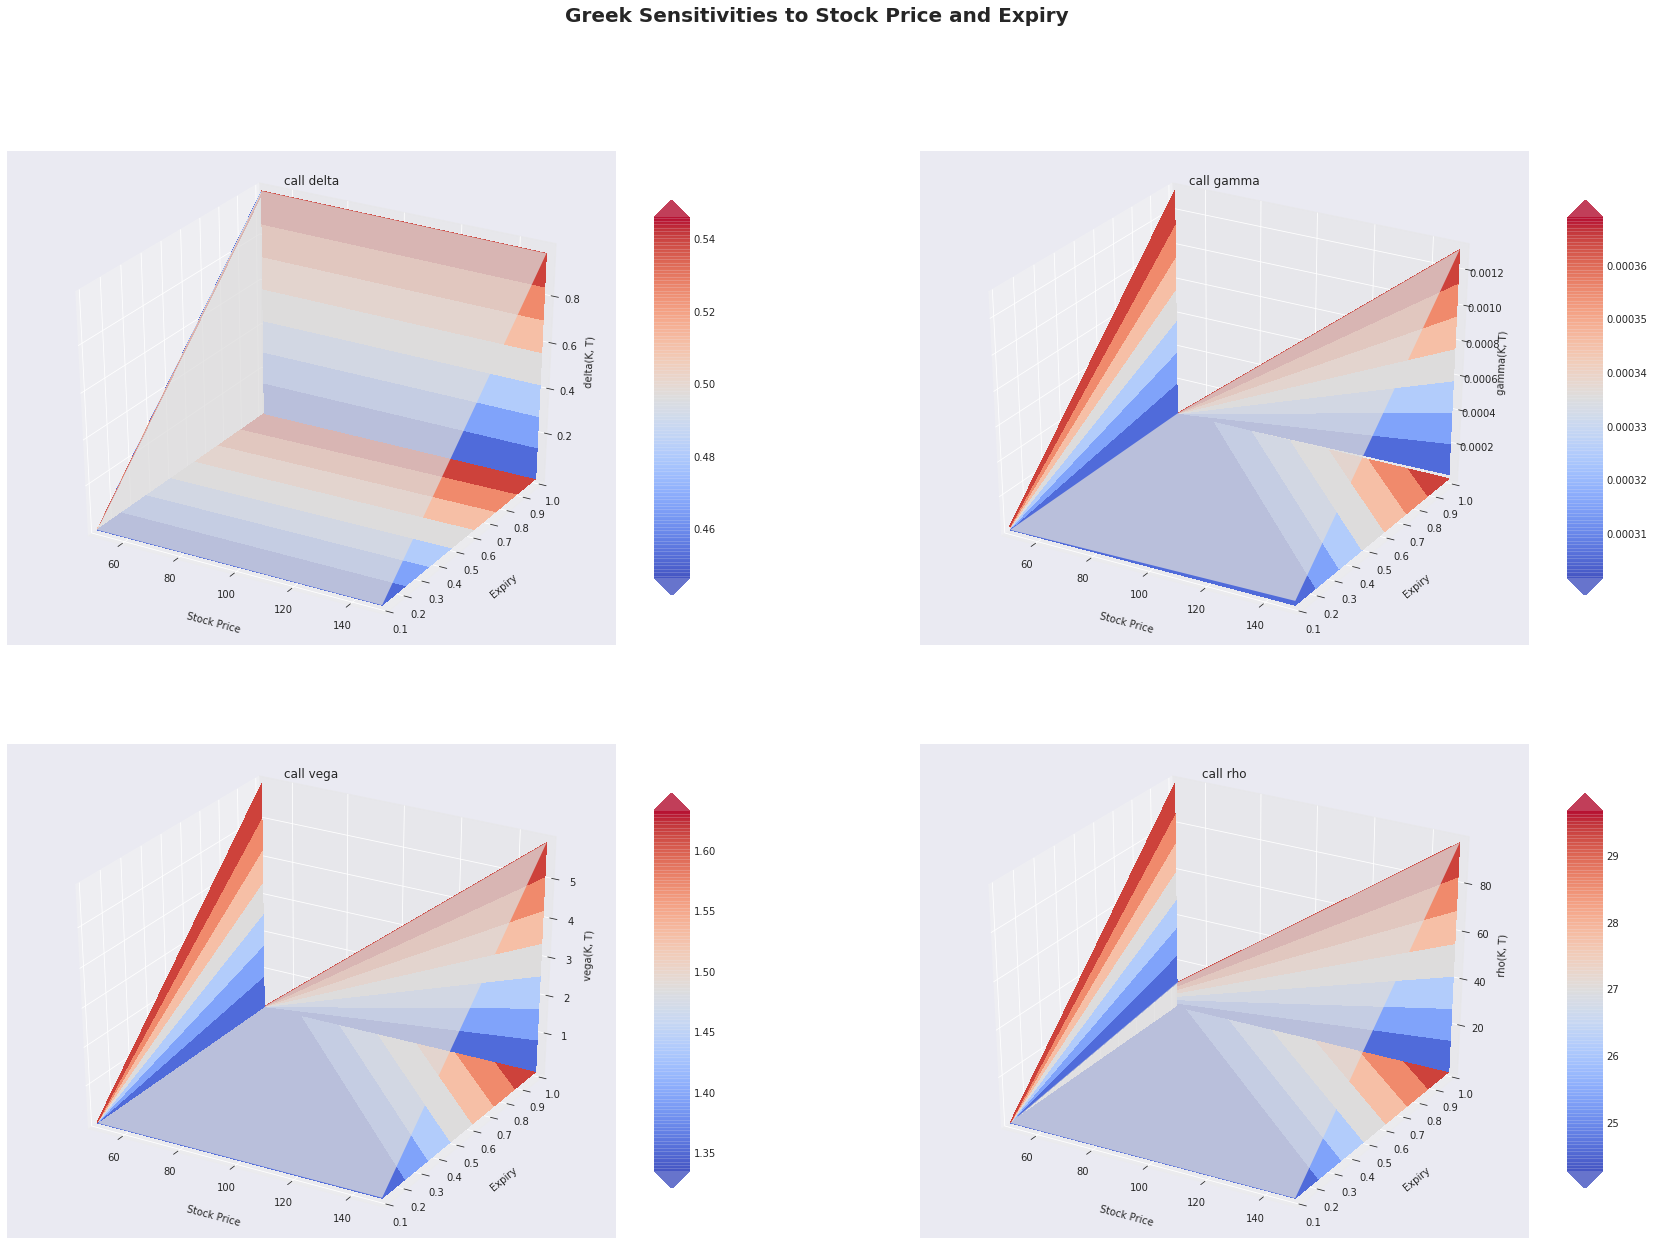

In [59]:
S_range = np.linspace(50, 150, 2)
K_range = np.linspace(110.0, 110.0, 2)
T_range = np.linspace(0.1, 1.0, 2)
r_range = np.linspace(0.0, 0.1, 2)
sigma_range = np.linspace(0.2, 0.2, 2)

x, y  = np.meshgrid(S_range, T_range)

fig = plt.figure(figsize=(30,20))
fig.suptitle("Greek Sensitivities to Stock Price and Expiry",fontsize=20, fontweight='bold')
greeks = [delta, gamma, vega, rho]

for i in range(len(greeks)):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    greeks_surface(greeks[i], S_range, K_range, r_range, sigma_range, T_range, ex, "Stock Price", "Expiry", x, y, ax)

plt.show()

## Monte Carlo Methods

Assume again that underlying spot follows Geometric Brownian Motion. We obtain the logarithm of $S_t$ which ensures the stock price remains greater than or equal to zero.

\begin{equation*}
ln(S_t)=ln(S)+(\mu-\frac{\sigma^2}{2})t+\sigma \int_{0}^{t}dW
\end{equation*}

The final term denotes a Wiener process with variance $t$ and mean zero, and can therefore be rewritten as $\sqrt{t} \Phi(0,1)$. If we now make a risk-neutral assumption the drift $\mu$ becomes the risk-free interest rate $r$. Thus, we can determine the stock price at maturity $T$:

\begin{equation*}
S_t=S\times exp[(r-\frac{\sigma^2}{2})t+\sigma \sqrt{t} \Phi(0,1)]
\end{equation*}

In a Monte Carlo simulation we generate a large number of price estimates using the above expression which we then use to estimate the option price. The option price is determined by calculating the expected value of some pay-off function and then discounting by the increase in value due to the risk-free interest rate.

\begin{equation*}
Call=Max[(S_T-K),0]\\
Put=Max[(K-S_T),0]
\end{equation*}

## Python Implementation

We create a conifguration class to store the simulation parameters.

In [21]:
class Configuration:
    def __init__(self, scenarios, timesteps):
        self.scenarios=scenarios 
        self.timesteps = timesteps

In [22]:
def SimulateUnderlying(Configuration, Option):
    prices = []

    for scenarios in range(Configuration.scenarios):
        normal_random_number = np.random.normal(0, 1)           
        drift = (Option.r-0.5*(Option.sigma**2)) *Configuration.timesteps
        uncertainty = Option.sigma*np.sqrt(Configuration.timesteps)*normal_random_number

        price = Option.S * np.exp(drift+uncertainty)
        prices.append(price)    
    return prices

In [23]:
def MCPrice(prices, Option):
    pay_offs = 0
    scenarios = len(prices)
    for i in range(scenarios):
        price = prices[i]
        if(Option.option=='call'):
            pay_off = np.maximum(price - Option.K, 0)
            pay_offs=pay_offs+pay_off
        elif(Option.option=='put'):
            pay_off = np.maximum(Option.K - price, 0)
            pay_offs=pay_offs+pay_off
    discounted_price = (np.exp(-Option.r * Option.T)*pay_offs)
    result = discounted_price/scenarios
    return result

For this example, we only are concerned with one time step as it’s an European option.

In [24]:
Config = Configuration(100000, 1)

In [25]:
ex = Option(100, 110, 1, 0.1, 0.25, 'call')

In [26]:
Sim_prices = SimulateUnderlying(Config, ex)

In [27]:
MCPrice(Sim_prices, ex)

10.151856213831097

In [28]:
def plot_scenario_paths(prices, Option):
    x=[]
    y=[]
    for i in prices:
        y.append(i)
        y.append(Option.S)
        x.append(1)            
        x.append(0)            
        plt.plot(x, y)
        
    plt.ylabel('Stock Value')
    plt.xlabel('Timestep')
    plt.show()

## Possible improvements